C:\Users\jamee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best value of k: 13


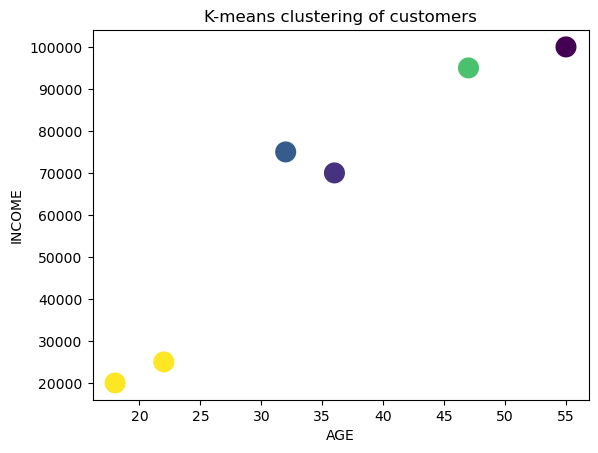

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data_file = "customer_data.csv" 
data = pd.read_csv(data_file)

# Split the data in a 70:30 ratio
train_data, test_data = train_test_split(data, test_size=0.3, random_state=21)

# Normalize the data
scaler = StandardScaler()

# K-means clustering
k_values = range(1,14)  # Test different values of k (e.g., from 2 to 10)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=21)
    pipeline = Pipeline([("scaler", scaler), ("kmeans", kmeans)])
    pipeline.fit(train_data)
    inertia_values.append(pipeline.named_steps["kmeans"].inertia_)

# Identify the best value of k
best_k = k_values[inertia_values.index(min(inertia_values))]
print("Best value of k:", best_k)

# Apply k-means with the best value of k
kmeans = KMeans(n_clusters=best_k, random_state=21)
pipeline = Pipeline([("scaler", scaler), ("kmeans", kmeans)])
pipeline.fit(train_data)
clusters = pipeline.predict(test_data)

# Visualize the results of the clustering
x_feature = 'age'
y_feature = 'income'

plt.scatter(test_data[x_feature], test_data[y_feature], c=clusters, cmap='viridis', marker='o', s=200)
plt.xlabel("AGE"),plt.ylabel("INCOME"),plt.title("K-means clustering of customers")
plt.show()